In [1]:
import utilities2 as ut2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Methods 1 - A model setup

According to the goals of the study we need to calculate the range of alkalinity fluxes at the sediment-water interface (SWI) and the corresponding variations in the water column of the Wadden Sea.
For calculations we use the software written in Fortran.
It consist of:
1) a governing program resolving a transport equation (diffusive and vertical advective (sinking, burying) terms) between and within water column and sediments plus horizontal exchange with an external pool - the 1-D Sympagic-Pelagic-Benthic transport Model, SPBM [(Yakubov et al., 2019)]; 
2) a biogeochemical model sending sources minus sinks to the transport equation governing program.
The SPBM and biogeochemical model are linked through the Framework for Aquatic Biogeochemical Models, FABM [(Bruggeman and Bolding, 2014)].

[(Yakubov et al., 2019)]: https://doi.org/10.3390/w11081582
[(Bruggeman and Bolding, 2014)]: https://doi.org/10.1016/j.envsoft.2014.04.002

The transport and biogeochemical models operate with the following **state variables**:
autotrophs ($\text{Phy}$), heterotrophs ($\text{Het}$), $\text{NH}_{4}^{+}$, $\text{NO}_{2}^{-}$, $\text{NO}_{3}^{-}$,
$\text{Si}$, $\text{PO}_{4}^{3 -}$, $\text{O}_{2}$, $\text{SO}_{4}^{2 -}$, $\text{S}_{2}\text{O}_{3}^{2 -}$, $\text{S}^{0}$, $\text{H}_{2}\text{S}$, dissolved inorganic carbon
($\text{DIC}$), dissolved OM ($\text{DOM}$), particulate OM ($\text{POM}$), and total alkalinity ($\text{TA}$).
$\text{Phy}$, $\text{Het}$, and $\text{POM}$ are particulates and can sink.

#### The grid

For calculations, we should first determine a proxy of the Wadden Sea.
We will use a 1-d multilayer model with the following grid.
Assuming a mean depth of the Wadden Sea of 2.5 m [(van Beusekom et al., 1999)], we split the water domain into two layers of 1.25 m and 1.15 m depth.
Near the bottom, we have a benthic boundary layer (BBL) consisting of 2 layers of 0.05 m depth each.
The BBL is a layer with eddy diffusion coefficients decreasing linearly to zero at the SWI.
The sediment domain has 40 layers of 0.01 m depth each.
Therefore, to study sedimentary alkalinity generation in the Wadden Sea we use the vertically resolved box containing the water and sediment domains.

[(van Beusekom et al., 1999)]: https://link.springer.com/article/10.1007/BF02764176

![Image](Grid.png "grid")

The transport program (SPBM) updates the concentrations of the state variables in the center of each layer due to sources minus sinks terms from the biogeochemical model, diffusive and advective terms plus horizontal exchange with an external pool (which represent the North Sea) each time step (300 sec.).

#### Forcing, initial and boundary conditions

The functioning of the transport and biogeochemical models needs some forcing (for example, to calculate sources minus sinks terms the biogeochemical model requires data of seawater temperature, salinity, and photosynthetically active radiation (PAR)), also we have to establish state variables initial conditions and conditions on the boundaries of the modeling box.
The data for forcing (seawater temperature, salinity, density) and initial conditions are averaged to one year from the World Ocean Database (WOD) for the years 2000 - 2010 from a rectangular region (the Southern North Sea, 54.35-55.37$^{\circ}$N 6.65-8.53$^{\circ}$E) that is adjacent to the North Frisian Wadden Sea.
The data from WOD are stored in `wadden_sea.nc` file.
The data of Chlorophyll-a are taken from [Loebl et al. (2007)].
The data of $\text{NH}_{4}^{+}$ are taken from [van Beusekom et al. (2009)].
Boundary conditions are set up for carbon and $\text{O}_{2}$ at the surface boundary as an exchange with the atmosphere according to [(Yakushev et al., 2017)].
For all other species, boundary conditions at the bottom and the surface interfaces of the model box are set to zero fluxes.

[Loebl et al. (2007)]: https://doi.org/10.1016/j.seares.2007.06.003
[van Beusekom et al. (2009)]: https://doi.org/10.1016/j.seares.2008.06.005
[(Yakushev et al., 2017)]: https://doi.org/10.5194/gmd-10-453-2017

For diffusive updates, SPBM needs to know the vertical diffusion coefficients in the water column and the dispersion coefficients in sediments (which are analogs to vertical diffusion coefficients in the water column).
The vertical diffusion coefficients in the water column are calculated according to the vertical density distributions following [Gargett (1984)].
Vertical advective updates in the water column (sinking of the particles) are calculated according to the sinking velocities of particles.
The dispersion coefficients in sediments and sinking velocities of particles are discussed in **Methods 3**.
Vertical advective updates in the sediments (burying) are neglected (no burying).

[Gargett (1984)]: https://doi.org/10.1357/002224084788502756

SPBM also calculates state variables horizontal exchange with an external pool (it represent the North Sea) and allochthonous organic matter influx to the modeling box.
To supply the model water domain with nutrients for the proper functioning of the phytoplankton model, we introduce an horizontal exchange of phosphates, ammonium, nitrates, and silicates with external concentrations (data from the World Ocean Database and [van Beusekom et al. (2009)]) controlled by the horizontal diffusivity coefficient$\ K_{h}$ ([Okubo, 1971], [Okubo, 1976]).
Along with concentrations of the corresponding elements, phosphate, ammonium and nitrate exchange also affect alkalinity according to $\text{TA}_{\text{ec}}$ expression.
To reflect the heterotrophic nature of the Wadden Sea ([van Beusekom et al., 1999]) we add an additional advective influx of $\text{POM}$.
This $\text{POM}$ input is adopted from the value for the net import of OM to the Sylt-Rømø basin in the North Frisian Wadden Sea (110 $\text{g}\ \text{m}^{- 2}\ \text{year}^{- 1}$) reported in [(van Beusekom et al., 1999)] as a sinusoidal curve with a maximum in May ([Joint and Pomroy, 1993]; [de Beer et al., 2005]).
This value is also close to the Wadden Sea average OM input (100 $\text{g}\ \text{m}^{- 2}\ \text{year}^{- 1}$) from the North Sea ([van Beusekom et al., 1999]).

[van Beusekom et al. (2009)]: https://doi.org/10.1016/j.seares.2008.06.005
[Okubo, 1971]: https://doi.org/10.1016/0011-7471(71)90046-5
[Okubo, 1976]: https://doi.org/10.1016/0011-7471(76)90897-4
[van Beusekom et al., 1999]: https://doi.org/10.1007/BF02764176
[Joint and Pomroy, 1993]: https://www.int-res.com/articles/meps/99/m099p169.pdf
[de Beer et al., 2005]: https://doi.org/10.4319/lo.2005.50.1.0113

`s_1_generate_netcdf.ipynb` reads the data from WOD (`wadden_sea.nc`) and forms another NetCDF data file `wadden_sea_out.nc` which contains the data filtered and averaged to one year, calculated diffusion coefficients, calculated theoretical surface PAR values for the region of the Wadden Sea, and calculated OM influx.
The governing program SPBM uses `wadden_sea_out.nc` to get all the necessary information.
There is an IPython notebook to check the data written in `wadden_sea_out.nc` - `s_2_check_data.ipynb`

#### Preliminary evaluations

Now we know how to calculate the transport of the state variables in our multilayer box representing the Wadden Sea, but we still missing a biogeochemical model to update concentration of the state variables due to biogeochemical reactions.
Here we provide some reasoning for the inclusion of some reactions and skipping other.
In the introduction, we gave the $\text{TA}_{\text{ec}}$ expression to describe which processes can contribute to alkalinity change.
There are thirteen terms in it and the most abundant biogeochemical processes in the coastal ocean can change the concentrations of six of them:
$2\lbrack\text{Ca}^{2 +}\rbrack$, $\text{TNH}_{3}$, $\lbrack\text{NO}_{3}^{-}\rbrack$, $\text{TPO}_{4}$, $2\text{TSO}_{4}$, $\text{THNO}_{2}$.
Now we can try to estimate which of them can be the most important ones.
At first, we can write down the mean concentrations of alkalinity and the mentioned compounds in the area of interest (all concentration are in $\text{mM m}^{- 3}$).

In [2]:
# get some data from WOD
par, temperature, no3, ammonium, po4, si, irradiance = ut2.get_data()

In [3]:
NH4 = ammonium.mean(); NO3 = no3.mean(); PO4 = po4.mean()
print('NH4={0}; NO3={1}, PO4={2}'.format(NH4, NO3, PO4))

NH4=3.43013698630137; NO3=16.124231302432, PO4=0.6163383757363852


Nitrites' concentration is negligibly small.
Also, we assume TA equal 2300.
$\text{Ca}^{2 +}$ and $\text{TSO}_{4}$ are the mayor ions of seawater with the following approximate concentrations (in $\text{mM m}^{- 3}$):

In [4]:
Ca = 10000; SO4 = 25000

To understand how biogeochemical reactions can affect TA we make a function calculating TA changes according to $\text{TA}_{\text{ec}}$ expression.
Then providing a change of a particular compound we can track a TA change.

In [5]:
def alk_change(TA, dCa=0, dSO4=0, dNH4=0, dNO3=0, dPO4=0):
    return TA + 2*dCa - 2*dSO4 + dNH4 - dNO3 - dPO4

In [6]:
def sinusoidal(max_value):
    """Creates a sinusoidal line with a period of 365,
       minimum value of zero,
       and a maximum value of max_value"""
    day=np.arange(0,365,1)
    return (1/2)*max_value*(1+np.sin(2*np.pi*((day-90)/365)))

Let's test a TA change due to a change of $\text{Ca}^{2 +}$ concentration.
For example, calcifiers consume 100 $\text{mM m}^{- 3}$ of $\text{Ca}^{2 +}$ during a year, and then the equal amount of calcifiers skeletons dissolve restoring the concentration of $\text{Ca}^{2 +}$ at the end of the year.

In [7]:
dCa = -sinusoidal(100); Ca_year = Ca + dCa
TA_year = alk_change(TA = 2300, dCa = dCa)
ox = np.arange(0,365,1)

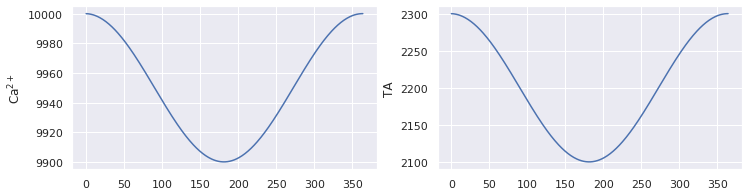

In [8]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 2, 1) # row-col-num
ax1 = fig.add_subplot(1, 2, 2)
ax.plot(ox, Ca_year); ax1.plot(ox, TA_year)
ax.set_ylabel('Ca$^{2+}$'); ax1.set_ylabel('TA');

We see that consuming of 100 $\text{mM m}^{- 3}$ of $\text{Ca}^{2 +}$ decreases alkalinity by 200 $\text{mM m}^{- 3}$, which is obviously clear from $\text{TA}_{\text{ec}}$ expression.
Also it is clear that the local activities of calcifiers cannot increase alkalinity above 2300 $\text{mM m}^{- 3}$.
To increase TA we need an input of $\text{Ca}^{2 +}$, which can come in form of $\text{Ca}^{2 +}$ or $\text{CaCO}_3$.
Additional $\text{Ca}^{2 +}$ can come with terrestial input which we do not consider here.
The supply of allochthonuous $\text{CaCO}_3$ to the Wadden Sea has not yet been reported ([Thomas et al., 2009]).
Therefore according to the goal to calculate the maximum alkalinity generation in the Wadden Sea due to biogeochemical processes as a first approximation we can skip $\text{CaCO}_3$ precipitation / dissolution while preparing a biogeochemical model.

[Thomas et al., 2009]: https://doi.org/10.5194/bg-6-267-2009

Now let's assume that sulfate reduction decreases $\text{SO}_{4}^{2 -}$ by 100 $\text{mM m}^{- 3}$.

In [19]:
dSO4 = -sinusoidal(100)
SO4_year = SO4 + dSO4
TA_year = alk_change(TA = 2300, dSO4 = dSO4)

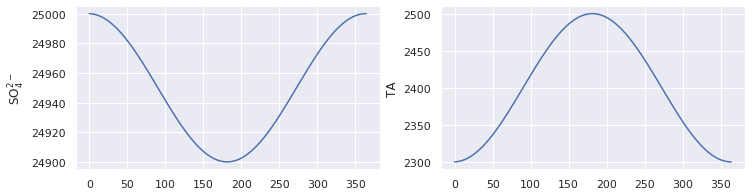

In [20]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 2, 1); ax1 = fig.add_subplot(1, 2, 2)
ax.plot(ox, SO4_year); ax1.plot(ox, TA_year)
ax.set_ylabel('SO$_4^{2-}$'); ax1.set_ylabel('TA');

The main difference from $\text{Ca}^{2 +}$ is that $\text{SO}_{4}^{2 -}$ is negatively charged.
So decrease of $\text{SO}_{4}^{2 -}$ by 100 $\text{mM m}^{- 3}$ increases TA by 200 $\text{mM m}^{- 3}$.
Also, since $\text{SO}_{4}^{2 -}$ is a mayor ion and very abundant in seawater sulfate reduction has a tremendous potential to increase alkalinity.
Therefore, sulfate reduction can be the most important reaction while considering alkalinity generation due to biogeochemical processes in the coastal area.

We have another quite abundant in the coastal area negatively charged conservative ion - $\text{NO}_{3}^{-}$.
But according to $\text{TA}_{\text{ec}}$ expression it changes TA only by one mole per mole of $\text{NO}_{3}^{-}$ consumed / excreted.
Also, the concentration of $\text{NO}_{3}^{-}$ even being high are far lower comparing to $\text{SO}_{4}^{2 -}$ ion.
Anyway, we cannot ignore $\text{NO}_{3}^{-}$ mainly because it precedes $\text{SO}_{4}^{2 -}$ in a sequence of relative energetics of microbially mediated redox reactions (Stumm, W. S., and J. J. Morgan (1981). Aquatic Chemistry, John Wiley & Sons, Inc., p. 460).

$\text{MnO}_2$ and $\text{FeOOH}$ electron acceptors are also energetically preferable to $\text{SO}_{4}^{2 -}$ for OM oxidation.
But in the biogeochemical model, we can omit $\text{MnO}_2$ and $\text{FeOOH}$ electron acceptors.
With these processes, there will be less OM available for sulfate reduction, but since there is no $\text{Fe}^{2+}$ and $\text{Mn}^{2+}$ in $\text{TA}_{\text{ec}}$ expression iron and manganese reduction produces less alkalinity then sulfate reduction.
Also, $\text{MnO}_2$ and $\text{FeOOH}$ can oxidize reduced sulfur compounds to sulfate, it will decrease TA according to $\text{TA}_{\text{ec}}$ expression.
We can omit these variables since this assumption does not underestimate TA generation what is in the scope of our goals.
Also, the contents of both $\text{FeOOH}$ and $\text{Mn}^{4+}$ in the sediments of the Wadden Sea are quite low ([de Beer et al., 2005]).


[de Beer et al., 2005]: https://doi.org/10.4319/lo.2005.50.1.0113